# **EDA CALIDAD DEL VINO**


## **1. Importamos las librerías necesarias** ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

## **2. Obtención de los datos** ##

Cargamos los datos:

In [3]:
df_wine=pd.read_csv('..\data\winequality-red.csv',delimiter=',')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_wine.shape

(1599, 12)

In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


El dataset está formado por 1599 filas y 12 columnas (variables). Comprobamos que no hay valores nulos en el dataset. Todas las variables son numéricas (integer y float).

3. Limpieza de datos

In [6]:
df_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Renombraremos las columnas. Traduciremos los nombres al castellano para agilizar la lectura.

In [7]:
print(df_wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [8]:
df_wine.rename(columns={'fixed acidity':'ACIDEZ_FIJA','volatile acidity':'ACIDEZ_VOLATIL','citric acid':'ACIDO_CITRICO','residual sugar':'AZUCAR_RESIDUAL','chlorides':'CLORUROS','free sulfur dioxide':'_AZUFRE_LIBRE','total sulfur dioxide':'DIOX_AZUFRE_TOTAL','density':'DENSIDAD','pH':'PH','sulphates':'SULFITOS','alcohol':'ALCOHOL','quality':'CALIDAD'},inplace=True)

In [9]:
df_wine.head()

,ACIDEZ_FIJA,ACIDEZ_VOLATIL,ACIDO_CITRICO,AZUCAR_RESIDUAL,CLORUROS,_AZUFRE_LIBRE,DIOX_AZUFRE_TOTAL,DENSIDAD,PH,SULFITOS,ALCOHOL,CALIDAD
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos a analizar las distintas variables:<br>
- **ACIDEZ FIJA:** La acidez fija en el vino se refiere a los ácidos que no se evaporan fácilmente. Estos ácidos son fundamentales para la estructura, sabor y estabilidad del vino.  La acidez fija es una componente esencial que afecta múltiples aspectos del vino, desde su sabor y aroma hasta su estabilidad y capacidad de envejecimiento.
- **ACIDEZ VOLATIL:** se refiere a los ácidos que se pueden evaporar fácilmente y que contribuyen a la percepción de aromas y sabores no deseados, especialmente cuando están presentes en niveles elevados.La acidez volátil es un componente importante a monitorear en la producción de vino, ya que puede tener un impacto significativo en su calidad y estabilidad. Mientras que pequeñas cantidades pueden contribuir a la complejidad del vino, niveles altos son generalmente indeseables y se consideran defectuosos.
- **ÁCIDO CÍTRICO:** es un componente menor pero importante en el perfil ácido del vino. Contribuye al sabor y al equilibrio del vino y se puede usar para ajustar la acidez durante la vinificación, siempre con precaución y conocimiento de su impacto en el proceso de fermentación y en el producto final.
- **AZÚCAR RESIDUAL:**  se refiere al azúcar que queda sin fermentar después de que la fermentación se ha completado. La cantidad de azúcar residual en el vino puede variar considerablemente y tiene un impacto significativo en el sabor y el estilo del vino.
- **CLORUROS:** son sales, principalmente cloruro de sodio (sal común), que están presentes en pequeñas cantidades y pueden tener un impacto significativo en el sabor y la percepción del vino. Es un componente que, en niveles adecuados, pueden mejorar la complejidad y la percepción del sabor, pero en concentraciones altas pueden causar defectos y sabores no deseados. Los enólogos deben gestionar cuidadosamente los niveles de cloruros para asegurar la calidad del vino.
- **DIÓXIDO DE AZUFRE LIBRE:** es una forma de dióxido de azufre que no está ligado químicamente a otros componentes del vino y está disponible para actuar como un agente antimicrobiano y antioxidante. El SO₂ libre es crucial para la preservación del vino, ya que protege contra la oxidación y el crecimiento de microorganismos no deseados. Es un componente esencial en la vinificación moderna, proporcionando protección crucial contra la oxidación y los microorganismos no deseados. Los enólogos deben equilibrar cuidadosamente su uso para maximizar los beneficios sin comprometer la calidad del vino o la salud del consumidor.
- **DIÓXIDO DE AZUFRE TOTAL:**  se refiere a la suma de todas las formas de dióxido de azufre presentes en el vino, incluyendo tanto el dióxido de azufre libre como el combinado. Este compuesto es esencial en la elaboración del vino debido a sus propiedades antioxidantes y antimicrobianas, que ayudan a preservar la calidad y estabilidad del vino durante su producción y almacenamiento. Es un componente esencial en la vinificación que incluye tanto el SO₂ libre como el combinado. Su correcta gestión es crucial para asegurar la calidad, estabilidad y seguridad del vino, equilibrando la protección del vino con la percepción del consumidor y las regulaciones legales.
- **DENSIDAD:** es una medida de su masa por unidad de volumen y se expresa generalmente en gramos por mililitro (g/mL). Es un parámetro importante en la vinificación y se utiliza para monitorear y controlar diferentes aspectos del proceso de producción del vino. Es una medida fundamental que ayuda a los enólogos a monitorear y controlar el proceso de fermentación, asegurar la calidad del producto final, y hacer ajustes necesarios durante la producción. La medición precisa de la densidad permite predecir el contenido de alcohol y asegurar la consistencia en la elaboración del vino.
- **PH:** es una medida de la acidez del vino, que indica la concentración de iones de hidrógeno presentes en la solución. Se expresa en una escala logarítmica que va de 0 a 14, donde 7 es neutro, los valores por debajo de 7 son ácidos y los valores por encima de 7 son básicos. En el contexto del vino, los valores típicos de pH suelen estar entre 3.0 y 4.0. El pH en el vino es una medida crítica de su acidez que afecta la estabilidad microbiológica, el sabor, el color y el proceso de vinificación. La gestión adecuada del pH es esencial para producir vinos de alta calidad y mantener su estabilidad a lo largo del tiempo.
- **SULFITOS:** son compuestos que contienen el ion sulfito (SO₃²⁻). En la vinificación, se refieren comúnmente al dióxido de azufre (SO₂) y sus derivados, que se utilizan como conservantes y antioxidantes para preservar el vino y mantener su calidad.  Los sulfitos son compuestos esenciales en la vinificación que actúan como conservantes y antioxidantes, protegiendo el vino de la oxidación y el deterioro microbiano. Aunque son seguros para la mayoría de las personas, aquellos con sensibilidad a los sulfitos deben prestar atención al etiquetado del vino. Los niveles y el uso de sulfitos están regulados para garantizar la calidad y la seguridad del producto final.
- **ALCOHOL:**  se refiere específicamente al etanol (C₂H₅OH), que es el tipo de alcohol presente en las bebidas alcohólicas. En el contexto del vino, el alcohol se produce como resultado de la fermentación alcohólica, un proceso en el cual las levaduras convierten los azúcares presentes en el mosto de uva en alcohol y dióxido de carbono. Es el resultado de la fermentación alcohólica, aportando estructura, sabor y características sensoriales al vino. Es un componente fundamental que define su perfil y contribuye significativamente a la experiencia de degustación y disfrute del vino.
- **CALIDAD:** es un término amplio y subjetivo que se refiere a la excelencia general percibida del vino en términos de sus características sensoriales, su equilibrio y su capacidad para proporcionar una experiencia gustativa satisfactoria. La evaluación de la calidad del vino implica considerar múltiples aspectos que afectan su percepción y apreciación por parte del consumidor y los expertos en vino. Es un concepto complejo que abarca una variedad de factores sensoriales, técnicos y culturales. Es la combinación de características que hacen que un vino sea memorable, placentero y, en última instancia, valioso para quienes lo disfrutan y lo evalúan.















In [10]:
df_wine.describe()

,ACIDEZ_FIJA,ACIDEZ_VOLATIL,ACIDO_CITRICO,AZUCAR_RESIDUAL,CLORUROS,_AZUFRE_LIBRE,DIOX_AZUFRE_TOTAL,DENSIDAD,PH,SULFITOS,ALCOHOL,CALIDAD
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Esta tabla proporciona una serie de estadísticas descriptivas que ayudan a entender la distribución y variabilidad de cada variable en el conjunto de datos. A continuación interpretaremos cada fila:

**1. count:** Indica el número de observaciones (filas) no nulas para cada variable. En este caso, hay 1599 observaciones para cada variable, lo que significa que no hay valores nulos.

**2. mean:** Muestra la media (promedio) de cada variable. Por ejemplo, la media de la acidez fija es 8.319637.

**3. std:** Representa la desviación estándar, que mide la dispersión de los valores alrededor de la media. Una desviación estándar más alta indica que los datos están más dispersos.

**4. min:** El valor mínimo de cada variable. Por ejemplo, el valor mínimo de la acidez fija es 4.6.

**5. 25%:** El primer cuartil (Q1), es decir, el 25% de los datos están por debajo de este valor. Por ejemplo, el 25% de los valores de acidez fija están por debajo de 7.1.

**6. 50% (median):** La mediana, que es el valor que divide los datos en dos partes iguales. El 50% de los valores están por debajo de este punto. Por ejemplo, la mediana de la acidez fija es 7.9.

**7. 75%:** El tercer cuartil (Q3), es decir, el 75% de los datos están por debajo de este valor. Por ejemplo, el 75% de los valores de acidez fija están por debajo de 9.2.

**8. max:** El valor máximo de cada variable. Por ejemplo, el valor máximo de la acidez fija es 15.9.

Vamos a interpretar algunas variables en detalle:

**ACIDEZ_FIJA**
mean: 8.319637
std: 1.741096
min: 4.6
25%: 7.1
50%: 7.9
75%: 9.2
max: 15.9
La acidez fija tiene una media de 8.32, con una desviación estándar de 1.74, lo que indica cierta variabilidad alrededor de la media. El rango de valores es amplio, de 4.6 a 15.9, y el 50% de los valores se encuentran entre 7.1 y 9.2.

**ACIDEZ_VOLATIL**
mean: 0.527821
std: 0.179060
min: 0.12
25%: 0.39
50%: 0.52
75%: 0.64
max: 1.58
La acidez volátil tiene una media de 0.53 con una desviación estándar de 0.18, indicando menos dispersión comparada con la acidez fija. El rango de valores va de 0.12 a 1.58.

**AZUCAR_RESIDUAL**
mean: 2.538806
std: 1.409928
min: 0.9
25%: 1.9
50%: 2.2
75%: 2.6
max: 15.5
El azúcar residual tiene una media de 2.54 y una desviación estándar de 1.41, indicando una dispersión considerable. Los valores varían de 0.9 a 15.5, y el 50% de los datos están entre 1.9 y 2.6.

**DENSIDAD**
mean: 0.996747
std: 0.001887
min: 0.990070
25%: 0.995600
50%: 0.996750
75%: 0.997835
max: 1.003690
La densidad tiene una media de 0.996747 y una desviación estándar de 0.001887, lo que indica que los valores están muy concentrados alrededor de la media. El rango es estrecho, de 0.990070 a 1.003690.

**CALIDAD** (Calidad del vino)
mean: 5.636023
std: 0.807569
min: 3.0
25%: 5.0
50%: 6.0
75%: 6.0
max: 8.0
La calidad del vino tiene una media de 5.64 y una desviación estándar de 0.81, indicando cierta variabilidad. Los valores van de 3 a 8, y el 50% de los valores están entre 5 y 6.

**Resumen** 
Los datos muestran variabilidad en todas las características medidas del vino. La media y la desviación estándar proporcionan una idea de la concentración y dispersión de los valores, mientras que los cuartiles y los valores extremos ayudan a entender la distribución y el rango de los datos.








## **4. Análisis y visualización** ##

In [11]:
df_wine.corr()

,ACIDEZ_FIJA,ACIDEZ_VOLATIL,ACIDO_CITRICO,AZUCAR_RESIDUAL,CLORUROS,_AZUFRE_LIBRE,DIOX_AZUFRE_TOTAL,DENSIDAD,PH,SULFITOS,ALCOHOL,CALIDAD
ACIDEZ_FIJA,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
ACIDEZ_VOLATIL,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
ACIDO_CITRICO,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
AZUCAR_RESIDUAL,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
CLORUROS,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
_AZUFRE_LIBRE,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
DIOX_AZUFRE_TOTAL,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
DENSIDAD,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
SULFITOS,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


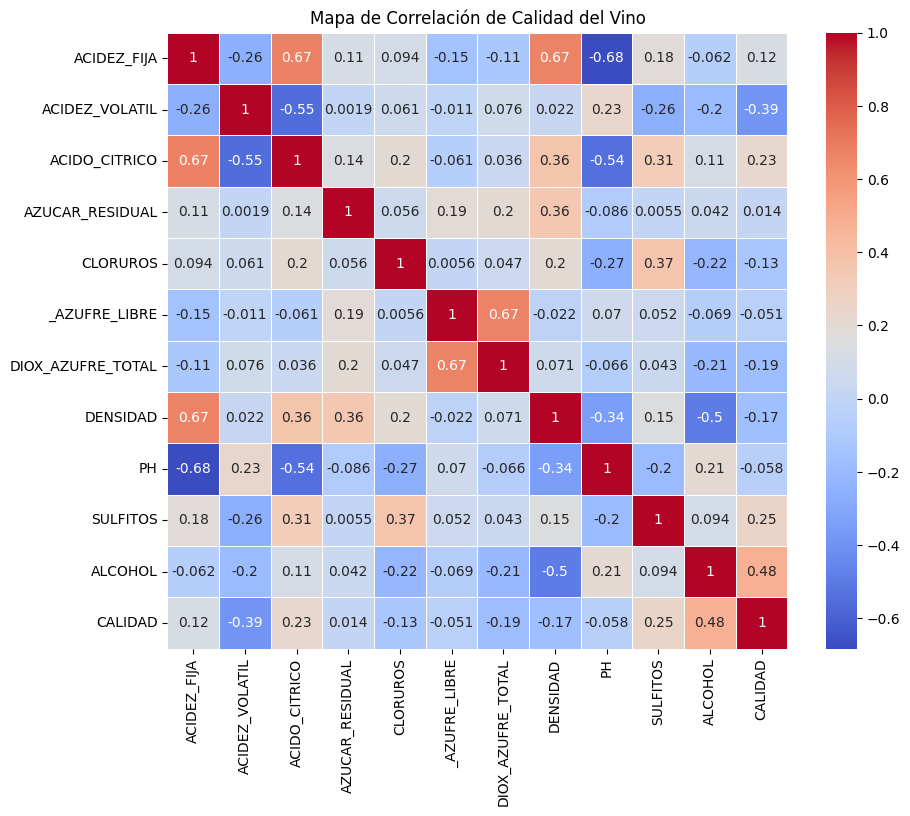

In [12]:
corr_matrix = df_wine.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlación de Calidad del Vino')
plt.show()

•	La calidad del vino tiene una correlación moderada positiva con el alcohol (0.476166) y los sulfitos (0.251397), y una correlación moderada negativa con la acidez volátil (-0.390558). Esto sugiere que los vinos con más alcohol y más sulfitos tienden a ser de mejor calidad, mientras que los vinos con mayor acidez volátil tienden a ser de menor calidad.<br>
•	La acidez fija está fuertemente correlacionada con la densidad y el ácido cítrico, lo que sugiere que estas propiedades químicas están interrelacionadas en el vino.<br>
•	El pH muestra una fuerte correlación negativa con la acidez fija y el ácido cítrico, lo que tiene sentido químicamente ya que una mayor acidez generalmente reduce el pH.<br>

Cada una de estas correlaciones puede proporcionar información útil para entender cómo las diferentes propiedades del vino están interrelacionadas y cómo pueden influir en la calidad percibida del vino.


Basándonos en la matriz de correlación podemos identificar varios pares de variables que muestran correlaciones interesantes.

ALCOHOL y CALIDAD<br>
Correlación: 0.476166
Esta correlación es moderadamente alta y positiva, lo que sugiere que a medida que aumenta el contenido de alcohol, la calidad del vino tiende a mejorar.

SULFITOS y CALIDAD<br>
Correlación: 0.251397
Aunque no es muy alta, esta correlación positiva indica que puede haber una relación entre los sulfatos y la calidad del vino.

ACIDO CITRICO y ACIDEZ FIJA<br>
Correlación: 0.671703
Esta es una correlación alta y positiva, indicando una relación fuerte entre la acidez cítrica y la acidez fija.

DENSIDAD y ALCOHOL<br>
Correlación: -0.496180
Esta es una correlación negativa relativamente alta, lo que sugiere que a medida que aumenta el contenido de alcohol, la densidad del vino tiende a disminuir.

DENSIDAD y AZUCAR RESIDUAL <br>
Correlación: 0.355283
Correlación positiva moderada, sugiere que a medida que el azúcar residual aumenta, también lo hace la densidad del vino.

PH y ACIDEZ FIJA<br>
Correlación: -0.682978
Correlación negativa alta, sugiere que a mayor acidez fija, el pH tiende a ser más bajo.

A continuación visualizaremos algunos de estos pares de variables:

**Gráficos de dispersión**

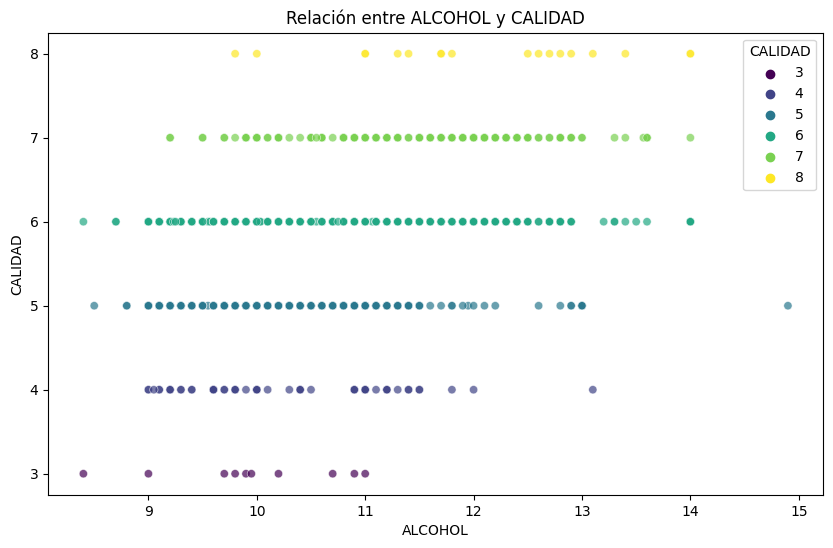

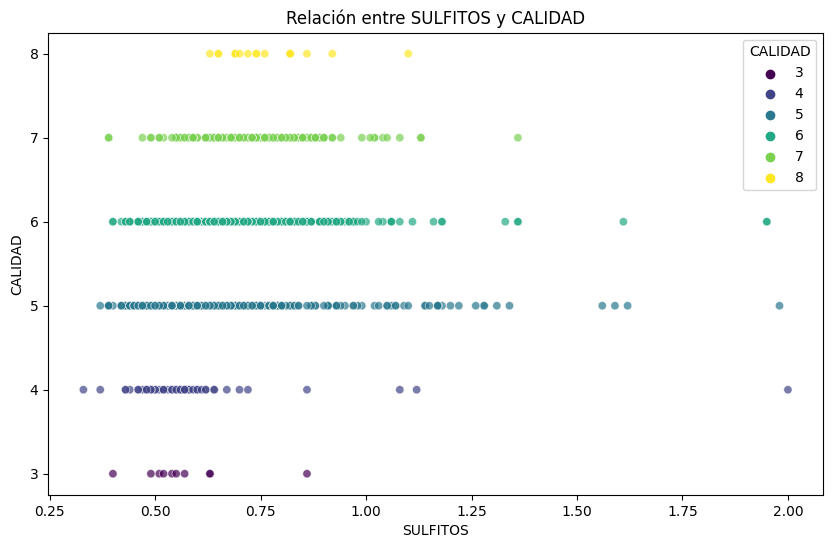

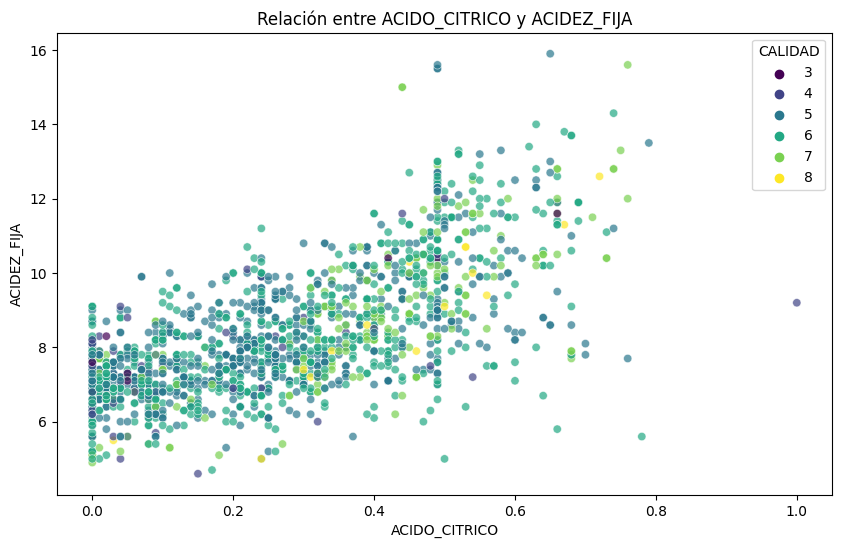

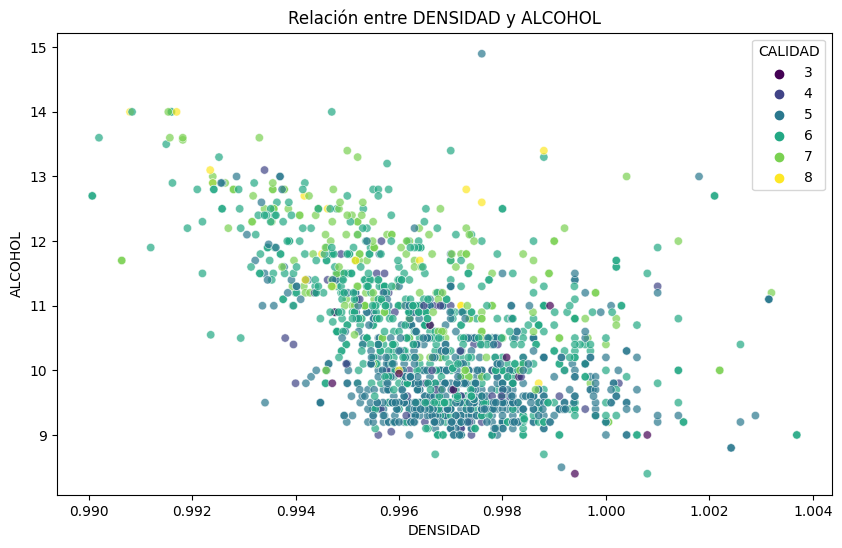

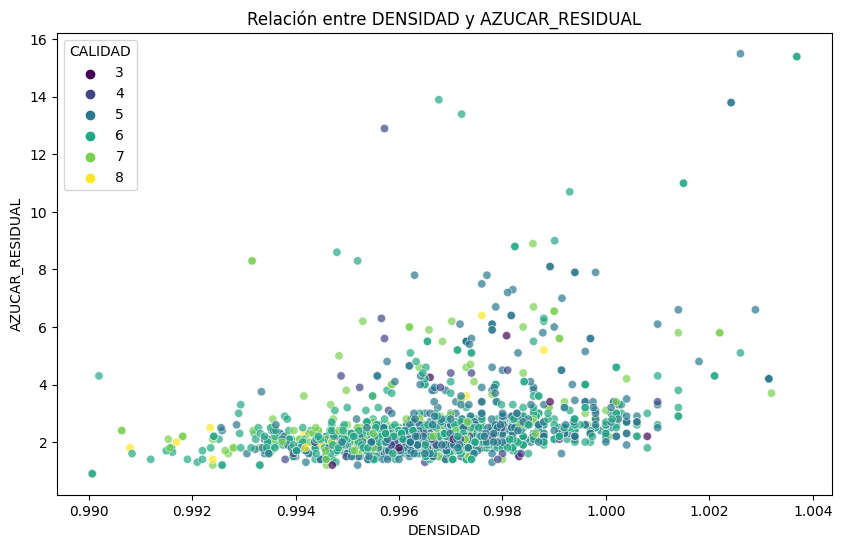

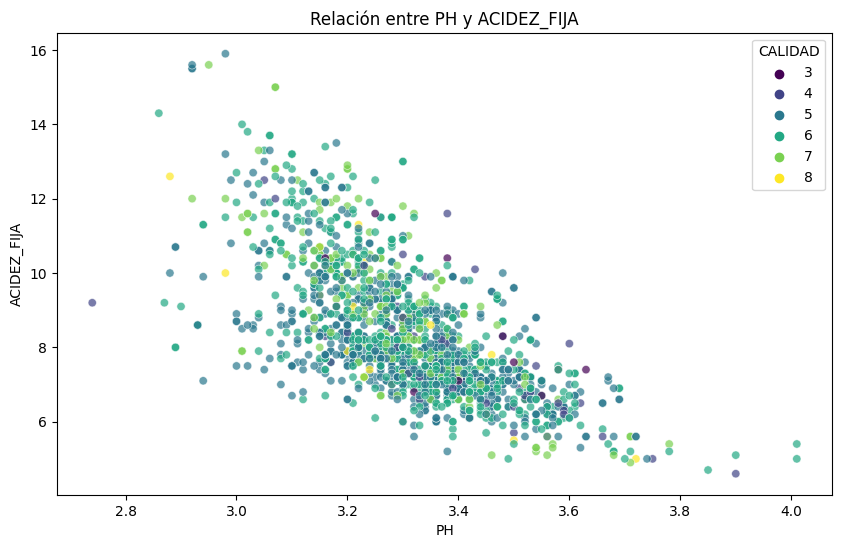

In [13]:
# Lista de pares de variables para gráficos de dispersión
pairs = [
    ('ALCOHOL', 'CALIDAD'),
    ('SULFITOS', 'CALIDAD'),
    ('ACIDO_CITRICO', 'ACIDEZ_FIJA'),
    ('DENSIDAD', 'ALCOHOL'),
    ('DENSIDAD', 'AZUCAR_RESIDUAL'),
    ('PH', 'ACIDEZ_FIJA')
]

# Crear gráficos de dispersión
for x, y in pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_wine, x=x, y=y, hue='CALIDAD', palette='viridis', alpha=0.7)
    plt.title(f'Relación entre {x} y {y}')
    plt.show()

Con respecto a la **primera gráfica** (Relación entre Alcohol y Calidad):<br>
Observamos una relación positiva moderada entre el contenido de alcohol y la calidad del vino. A medida que aumenta el contenido de alcohol, también parece mejorar la calidad del vino.
Dispersión: Hay una variabilidad significativa en la calidad del vino para un mismo nivel de alcohol, lo que sugiere que aunque el alcohol influye en la calidad, no es el único factor determinante.

En la **segunda gráfica** (Relación entre Sulfitos y Calidad):<br>
Hay una relación positiva entre los sulfatos y la calidad del vino, aunque no es muy fuerte. Los vinos con mayor contenido de sulfitos tienden a tener una mejor calidad.
Distribución: Los puntos están dispersos, lo que indica que los sulfatos tienen una influencia limitada y que otros factores también afectan la calidad.

Comprobamos la **tercera gráfica** (Relación entre Ácido cítrico y Acidez fija):<br>
Existe una relación positiva fuerte entre la acidez cítrica y la acidez fija. A medida que aumenta la acidez cítrica, también lo hace la acidez fija.
Correlación Directa: Este gráfico sugiere que estos dos tipos de acidez están altamente relacionados y es probable que se influyan mutuamente.



En la **cuarta gráfica** (Relación entre Densidad y Alcohol):<br>
Existe una relación positiva fuerte entre la acidez cítrica y la acidez fija. A medida que aumenta la acidez cítrica, también lo hace la acidez fija.
Correlación Directa: Este gráfico sugiere que estos dos tipos de acidez están altamente relacionados y es probable que se influyan mutuamente.


Viendo la **quinta gráfica** (Relación entre Densidad y Azúcar Residual):<br>
Existe una relación positiva entre la densidad y el azúcar residual. A medida que aumenta el azúcar residual, también lo hace la densidad del vino.
Dispersión: La dispersión de los puntos indica que el azúcar residual no es el único factor que afecta la densidad del vino.

En la **última gráfica** (Relación PH y Acidez Fija):<br>
La acidez fija y la acidez cítrica están altamente correlacionadas, al igual que la densidad y el azúcar residual.

**Histogramas**

Utilizaremos histogramas para visualizar la distribución de cada variable numérica.
Nos permitirá observar la distribución de cada variable, detectar posibles sesgos, y comprobar si hay datos atípicos.

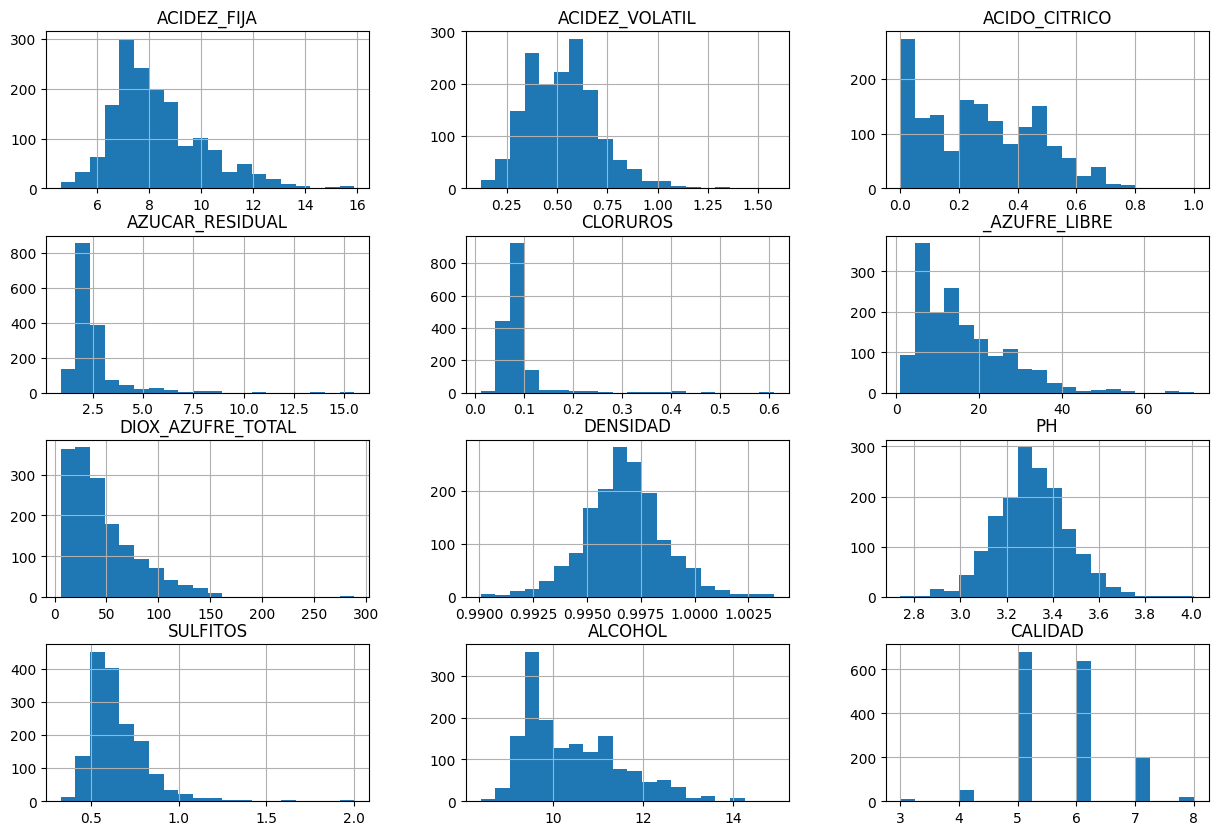

In [14]:
import matplotlib.pyplot as plt
df_wine.hist(bins=20, figsize=(15,10))
plt.show()

**ACIDEZ FIJA:**
La distribución de la acidez fija parece tener una forma ligeramente sesgada hacia la derecha, con la mayoría de los valores concentrados en un rango específico, probablemente entre 6 y 10. Esto indica que la mayoría de los vinos tienen una acidez fija en este rango.

**ACIDEZ VOLATIL:**
La acidez volátil también muestra una distribución sesgada hacia la derecha, con una concentración de valores bajos. La mayoría de los vinos tienen una acidez volátil menor a 1.0, lo que puede ser un indicador de la calidad del vino.

**ACIDO_CITRICO:**
El ácido cítrico tiene una distribución que parece ser bimodal, con dos picos prominentes. Muchos valores están cerca de cero, pero hay un segundo grupo de valores más altos. Esto podría indicar diferentes estilos o tipos de vinos en el conjunto de datos.

**AZUCAR RESIDUAL:**
La distribución del azúcar residual muestra una alta concentración de valores bajos, probablemente por debajo de 5. Esto sugiere que la mayoría de los vinos son secos o ligeramente dulces.

**CLORUROS:**
La variable de cloruros tiene una distribución sesgada hacia la derecha, con la mayoría de los valores bajos, probablemente menos de 0.1. Los valores más altos son raros.

**AZUFRE LIBRE:**
El azufre libre tiene una distribución con un sesgo hacia la derecha. La mayoría de los valores se encuentran en el rango bajo, probablemente entre 0 y 50.

**DIOX AZUFRE TOTAL:**
Similar al azufre libre, el dióxido de azufre total también tiene una distribución sesgada hacia la derecha, con la mayoría de los valores concentrados en la parte baja del rango.

**DENSIDAD:**
La densidad muestra una distribución bastante centrada, con la mayoría de los valores agrupados alrededor de un punto específico, lo cual es esperado ya que la densidad del vino no varía mucho.

**PH:**
El pH tiene una distribución aproximadamente normal, con la mayoría de los valores alrededor de 3.0 a 3.5, lo cual es común en los vinos.

**SULFITOS:**
Los sulfitos tienen una distribución sesgada hacia la derecha, con la mayoría de los valores bajos. Esto indica que la adición de sulfitos es generalmente baja.

**ALCOHOL:**
La distribución del alcohol muestra una forma más uniforme con un ligero sesgo hacia la derecha. La mayoría de los valores se encuentran en un rango moderado, probablemente entre 8 y 14 grados de alcohol.

**CALIDAD:**

La calidad parece tener una distribución ligeramente bimodal o uniforme con más vinos clasificándose en niveles de calidad media (por ejemplo, 5 y 6). Esto sugiere que la mayoría de los vinos en el conjunto de datos no son ni extremadamente malos ni excepcionalmente buenos.

Estos histogramas indican que muchas de las variables en el conjunto de datos de vinos tienen distribuciones sesgadas hacia la derecha, lo cual es común en datos de química de alimentos y bebidas. Las distribuciones muestran que ciertos niveles de acidez, azúcar, cloruros, y contenido de azufre son más comunes que otros, y la calidad de los vinos tiende a agruparse en torno a valores medios.

**Gráfico de barras**

In [ ]:
Bar Plot: Para variables categóricas (en este caso, CALIDAD puede ser considerada categórica).

Te permitirá ver la cantidad de observaciones en cada categoría de CALIDAD.

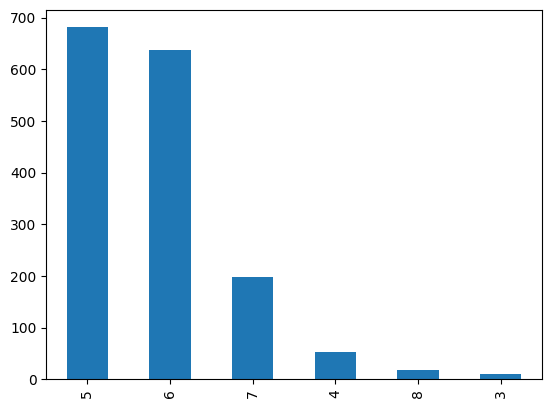

In [15]:
df_wine['CALIDAD'].value_counts().plot(kind='bar')
plt.show()

La calidad, en este conjunto de datos,toma valores entre 3 y 8.
La barra más alta está en la calidad 5, lo que sugiere que la mayoría de los vinos se evalúan con una calidad de 5.
Las calidades 6 y 4 también son bastante comunes, pero menos que la 5.
Hay muy pocos vinos con calidades extremas como 7.
No hay vinos evaluados en los niveles más bajos (1, 2, 3), ni en los más altos (8, 9, 10), indicando que esos niveles de calidad son muy raros en este conjunto de datos.









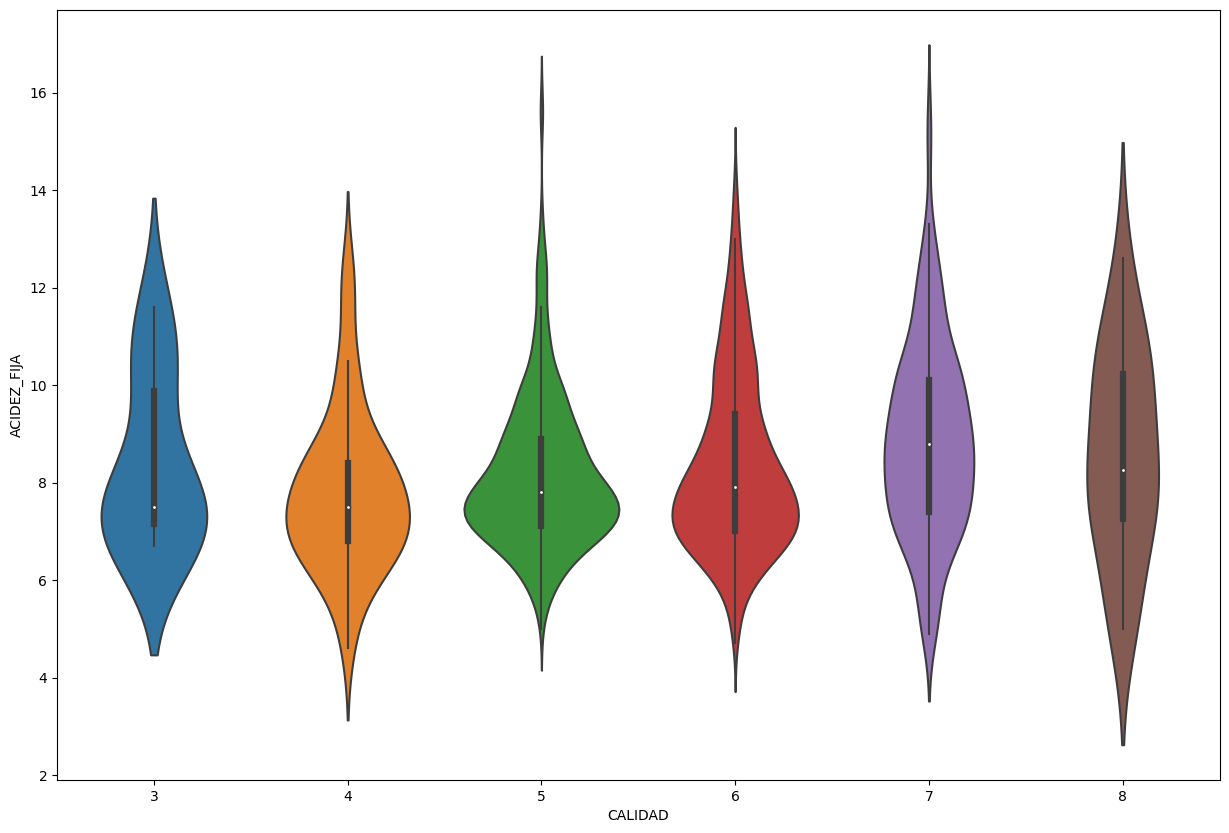

In [17]:
plt.figure(figsize=(15,10))
sns.violinplot(x='CALIDAD', y='ACIDEZ_FIJA', data=df_wine)
plt.show()

Calidad 5: La viola para calidad 5 es bastante ancha alrededor de un valor de acidez fija de 7, lo que indica que la mayoría de los vinos con calidad 5 tienen una acidez fija alrededor de este valor. La viola es más estrecha en valores mucho más bajos o mucho más altos.<br>
Calidad 6: La viola para calidad 6 es más ancha y tiene un rango más amplio, mostrando que hay una mayor variabilidad en la acidez fija para los vinos con calidad 6. La mediana puede estar alrededor de 7.5.<br>
Calidad 7: La viola para calidad 7 es estrecha y más simétrica, indicando una menor variabilidad y que la acidez fija está centrada alrededor de un valor específico.<br>
Calidad 8 y superiores: Si hay violas más pequeñas y estrechas para calidades superiores, puede indicar menos datos disponibles para esas calidades, o que esos vinos tienden a tener una acidez fija muy específica y menos variable.